In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud,STOPWORDS
import re
import string
import nltk
from collections import Counter
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.tokenize import word_tokenize, wordpunct_tokenize
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.neural_network.multilayer_perceptron import MLPClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,mean_absolute_error,mean_squared_error


In [3]:
fn_df = pd.read_csv('C:/DjangoProjects/data.csv')

In [4]:
fn_df.shape

(4009, 4)

In [5]:
fn_df.columns = ['URLs', 'title', 'text', 'label']

In [6]:
fn_df.head()

,URLs,title,text,label
0,http://www.bbc.com/news/world-us-canada-414191...,Four ways Bob Corker skewered Donald Trump,Image copyright Getty Images\nOn Sunday mornin...,1
1,https://www.reuters.com/article/us-filmfestiva...,Linklater's war veteran comedy speaks to moder...,"LONDON (Reuters) - “Last Flag Flying”, a comed...",1
2,https://www.nytimes.com/2017/10/09/us/politics...,Trump’s Fight With Corker Jeopardizes His Legi...,The feud broke into public view last week when...,1
3,https://www.reuters.com/article/us-mexico-oil-...,Egypt's Cheiron wins tie-up with Pemex for Mex...,MEXICO CITY (Reuters) - Egypt’s Cheiron Holdin...,1
4,http://www.cnn.com/videos/cnnmoney/2017/10/08/...,Jason Aldean opens 'SNL' with Vegas tribute,"Country singer Jason Aldean, who was performin...",1


In [7]:
fn_df.tail()

,URLs,title,text,label
4004,http://beforeitsnews.com/sports/2017/09/trends...,Trends to Watch,Trends to Watch\n% of readers think this story...,0
4005,http://beforeitsnews.com/u-s-politics/2017/10/...,Trump Jr. Is Soon To Give A 30-Minute Speech F...,Trump Jr. Is Soon To Give A 30-Minute Speech F...,0
4006,https://www.activistpost.com/2017/09/ron-paul-...,"Ron Paul on Trump, Anarchism & the AltRight",NaN,0
4007,https://www.reuters.com/article/us-china-pharm...,China to accept overseas trial data in bid to ...,SHANGHAI (Reuters) - China said it plans to ac...,1
4008,http://beforeitsnews.com/u-s-politics/2017/10/...,Vice President Mike Pence Leaves NFL Game Beca...,Vice President Mike Pence Leaves NFL Game Beca...,0


In [8]:
fn_df['title'].iloc[1]

"Linklater's war veteran comedy speaks to modern America, says star"

In [9]:
fn_df['text'].iloc[1]

'LONDON (Reuters) - “Last Flag Flying”, a comedy-drama about Vietnam war veterans, will resonate with Trump’s America, despite, or perhaps because of, its period setting, actor Bryan Cranston said on Sunday after a screening at the London Film Festival.\nSet in the United States in December 2003 – when U.S. forces in Iraq were dragging Saddam Hussein out of a “spider hole” - it is the story of three ageing former servicemen who reunite to bury the son of one of them who has been killed in action.\nWith President Donald Trump saying he could “totally destroy” North Korea and characterizing a dinner with military commanders as “the calm before the storm”, Cranston said “Last Flag Flying” was a timely reminder of the effect on normal Americans of ill-advised military campaigns.\n“I think it has a lot of relevance today in the sense that (today) it’s not clear cut as far as the (what are the) intentions of the government or military,” Cranston, acclaimed for his lead role in the TV drama “

In [10]:
fn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 4 columns):
URLs     4009 non-null object
title    4009 non-null object
text     3988 non-null object
label    4009 non-null int64
dtypes: int64(1), object(3)
memory usage: 125.4+ KB


In [11]:
fn_df['label'].value_counts()

0    2137
1    1872
Name: label, dtype: int64

In [12]:
fn_df.isnull().any()

URLs     False
title    False
text      True
label    False
dtype: bool

In [13]:
fn_df.isnull().sum()

URLs      0
title     0
text     21
label     0
dtype: int64

In [14]:
fn_df.dropna(axis=0, inplace=True)

In [15]:
fn_df.isnull().sum()

URLs     0
title    0
text     0
label    0
dtype: int64

# EDA

In [16]:
def word_count(text):
    return len(str(text).split())

In [17]:
fn_df['word_count'] = fn_df['text'].apply(word_count)

In [18]:
fn_df['char_count'] = fn_df['text'].str.len()

In [19]:
def upper_count(text):
    is_upper_len = len([word for word in word_tokenize(str(text)) if word.isupper()])
    return is_upper_len

In [20]:
fn_df['is_upper'] = fn_df['text'].apply(upper_count)

In [21]:
def stop_words_count(text):
    stop_words = stopwords.words('english')
    stopwords_len = len([word for word in word_tokenize(str(text)) if word in stop_words])
    return stopwords_len

In [22]:
fn_df['stopword_presence'] = fn_df['text'].apply(stop_words_count)

In [23]:
def check_punctuation(text):
    punct_len = len([punct for punct in word_tokenize(str(text)) if punct in string.punctuation])
    if punct_len < 0:
        return 'False'
    else:
        return 'True'

In [24]:
fn_df['punct check'] = fn_df['text'].apply(check_punctuation)

In [25]:
fn_df.head()

,URLs,title,text,label,word_count,char_count,is_upper,stopword_presence,punct check
0,http://www.bbc.com/news/world-us-canada-414191...,Four ways Bob Corker skewered Donald Trump,Image copyright Getty Images\nOn Sunday mornin...,1,1061,6412,5,424,True
1,https://www.reuters.com/article/us-filmfestiva...,Linklater's war veteran comedy speaks to moder...,"LONDON (Reuters) - “Last Flag Flying”, a comed...",1,551,3325,9,218,True
2,https://www.nytimes.com/2017/10/09/us/politics...,Trump’s Fight With Corker Jeopardizes His Legi...,The feud broke into public view last week when...,1,1086,6580,5,420,True
3,https://www.reuters.com/article/us-mexico-oil-...,Egypt's Cheiron wins tie-up with Pemex for Mex...,MEXICO CITY (Reuters) - Egypt’s Cheiron Holdin...,1,97,630,2,31,True
4,http://www.cnn.com/videos/cnnmoney/2017/10/08/...,Jason Aldean opens 'SNL' with Vegas tribute,"Country singer Jason Aldean, who was performin...",1,37,213,1,13,True


In [26]:
fn_df.describe()

,label,word_count,char_count,is_upper,stopword_presence
count,3988.000000,3988.000000,3988.000000,3988.000000,3988.000000
mean,0.468405,488.887663,2941.288365,10.229689,186.961133
std,0.499063,514.447982,3076.316585,17.600146,206.369884
min,0.000000,10.000000,66.000000,0.000000,0.000000
25%,0.000000,85.000000,557.500000,2.000000,23.750000
50%,0.000000,351.500000,2115.000000,6.000000,130.000000
75%,1.000000,725.250000,4311.250000,13.000000,282.000000
max,1.000000,5610.000000,32767.000000,342.000000,2301.000000


# VISUALIZATION

In [27]:
fn_df['text'] = fn_df['text'].apply(lambda text: str(text).lower())

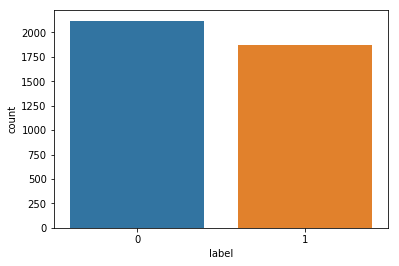

In [28]:
sns.countplot(x='label',data=fn_df)

In [29]:
real_tag = ''.join(news for news in fn_df['text'][fn_df['label']==1])

In [30]:
fake_tag = ''.join(news for news in fn_df['text'][fn_df['label']==0])

In [31]:
real_tag_most_word = pd.Series(Counter(str(real_tag).split()).most_common(25))

In [32]:
word_list =[]
freq_list =[]
for word, freq in real_tag_most_word:
    word_list.append(word)
    freq_list.append(freq)

real_dict = {'Word':word_list,'Frequency':freq_list}
real_tag_most_word_df = pd.DataFrame(real_dict)
real_tag_most_word_df.head(25)

,Word,Frequency
0,the,61296
1,to,28832
2,of,26278
3,a,26043
4,and,25059
5,in,23974
6,on,10923
7,that,10741
8,for,10418
9,is,8837


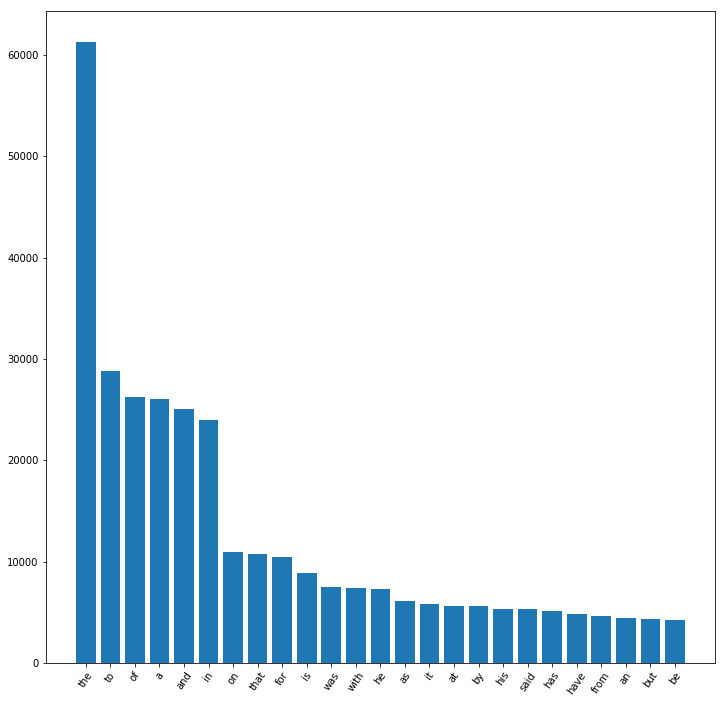

In [33]:
plt.figure(figsize=(12,12))
plt.bar(x=real_tag_most_word_df['Word'],height= real_tag_most_word_df['Frequency'])
plt.xticks(rotation=55)
plt.show()

In [34]:
fake_tag_most_word = pd.Series(Counter(str(fake_tag).split()).most_common())

In [35]:
wordcloud = WordCloud(background_color='white',stopwords=STOPWORDS,max_words=50)

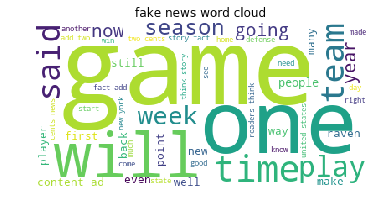

In [36]:
wc = wordcloud.generate(fake_tag)
plt.figure(figsize=(6,4))
plt.axis('off')
plt.title('fake news word cloud')
plt.imshow(wc)

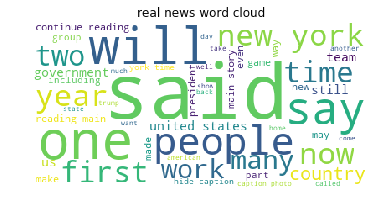

In [37]:
wc = wordcloud.generate(real_tag)
plt.figure(figsize=(6,4))
plt.axis('off')
plt.title('real news word cloud')
plt.imshow(wc)

# cleaning

In [38]:
fn_df['text'].head()

0    image copyright getty images\non sunday mornin...
1    london (reuters) - “last flag flying”, a comed...
2    the feud broke into public view last week when...
3    mexico city (reuters) - egypt’s cheiron holdin...
4    country singer jason aldean, who was performin...
Name: text, dtype: object

In [39]:
def remove_punctuation(text,keep_apostrophes=True):
    text = text.strip()
    if keep_apostrophes:
        PATTERN = r'[?|$|&|*|.|,|!|"|#|\|+|-|/|:|–|-|-|\|;|<|=|>|[|^|_|{|”|“|—|’|`|%|@|(|)|~]'
        #'[?|$|&|*|.|,|!|"|#|\|+|-|/|:|;|<|=|>|[|^|_|{|`|%|@|(|)|~]' 
        filtered_text = re.sub(PATTERN, r'', text)
    else:
        PATTERN = r'[^a-zA-Z0-9 ]'
        filtered_text = re.sub(PATTERN, r'', text)
    return filtered_text

In [40]:
fn_df['text'] = fn_df['text'].apply(remove_punctuation)

In [41]:
fn_df.head()

,URLs,title,text,label,word_count,char_count,is_upper,stopword_presence,punct check
0,http://www.bbc.com/news/world-us-canada-414191...,Four ways Bob Corker skewered Donald Trump,image copyright getty images\non sunday mornin...,1,1061,6412,5,424,True
1,https://www.reuters.com/article/us-filmfestiva...,Linklater's war veteran comedy speaks to moder...,london reuters last flag flying a comedydrama...,1,551,3325,9,218,True
2,https://www.nytimes.com/2017/10/09/us/politics...,Trump’s Fight With Corker Jeopardizes His Legi...,the feud broke into public view last week when...,1,1086,6580,5,420,True
3,https://www.reuters.com/article/us-mexico-oil-...,Egypt's Cheiron wins tie-up with Pemex for Mex...,mexico city reuters egypts cheiron holdings l...,1,97,630,2,31,True
4,http://www.cnn.com/videos/cnnmoney/2017/10/08/...,Jason Aldean opens 'SNL' with Vegas tribute,country singer jason aldean who was performing...,1,37,213,1,13,True


In [42]:
fn_df.tail()

,URLs,title,text,label,word_count,char_count,is_upper,stopword_presence,punct check
4003,http://beforeitsnews.com/u-s-politics/2017/10/...,CNN and Globalist Exposed - Steve Quayle and A...,vietnam is in great danger you must publish an...,0,15,83,0,3,True
4004,http://beforeitsnews.com/sports/2017/09/trends...,Trends to Watch,trends to watch\n of readers think this story ...,0,326,1833,10,135,True
4005,http://beforeitsnews.com/u-s-politics/2017/10/...,Trump Jr. Is Soon To Give A 30-Minute Speech F...,trump jr is soon to give a 30minute speech for...,0,57,386,1,18,True
4007,https://www.reuters.com/article/us-china-pharm...,China to accept overseas trial data in bid to ...,shanghai reuters china said it plans to accep...,1,316,1976,1,109,True
4008,http://beforeitsnews.com/u-s-politics/2017/10/...,Vice President Mike Pence Leaves NFL Game Beca...,vice president mike pence leaves nfl game beca...,0,588,3629,28,232,True


In [43]:
def remove_stopwords(text):
    stop_words = stopwords.words('english')
    clean_text = [word for word in word_tokenize(text) if 
                    word not in stop_words]
    return ' '.join(clean_text)

In [44]:
fn_df['text'] = fn_df['text'].apply(remove_stopwords)

In [45]:
fn_df.head()

,URLs,title,text,label,word_count,char_count,is_upper,stopword_presence,punct check
0,http://www.bbc.com/news/world-us-canada-414191...,Four ways Bob Corker skewered Donald Trump,image copyright getty images sunday morning do...,1,1061,6412,5,424,True
1,https://www.reuters.com/article/us-filmfestiva...,Linklater's war veteran comedy speaks to moder...,london reuters last flag flying comedydrama vi...,1,551,3325,9,218,True
2,https://www.nytimes.com/2017/10/09/us/politics...,Trump’s Fight With Corker Jeopardizes His Legi...,feud broke public view last week mr corker sai...,1,1086,6580,5,420,True
3,https://www.reuters.com/article/us-mexico-oil-...,Egypt's Cheiron wins tie-up with Pemex for Mex...,mexico city reuters egypts cheiron holdings li...,1,97,630,2,31,True
4,http://www.cnn.com/videos/cnnmoney/2017/10/08/...,Jason Aldean opens 'SNL' with Vegas tribute,country singer jason aldean performing las veg...,1,37,213,1,13,True


In [46]:
def stemming(text):
    steming = PorterStemmer()
    stem = [steming.stem(word) for word in word_tokenize(text)]
    return ' '.join(stem)

In [47]:
fn_df['text'] = fn_df['text'].apply(stemming)

In [48]:
fn_df.head()

,URLs,title,text,label,word_count,char_count,is_upper,stopword_presence,punct check
0,http://www.bbc.com/news/world-us-canada-414191...,Four ways Bob Corker skewered Donald Trump,imag copyright getti imag sunday morn donald t...,1,1061,6412,5,424,True
1,https://www.reuters.com/article/us-filmfestiva...,Linklater's war veteran comedy speaks to moder...,london reuter last flag fli comedydrama vietna...,1,551,3325,9,218,True
2,https://www.nytimes.com/2017/10/09/us/politics...,Trump’s Fight With Corker Jeopardizes His Legi...,feud broke public view last week mr corker sai...,1,1086,6580,5,420,True
3,https://www.reuters.com/article/us-mexico-oil-...,Egypt's Cheiron wins tie-up with Pemex for Mex...,mexico citi reuter egypt cheiron hold limit ri...,1,97,630,2,31,True
4,http://www.cnn.com/videos/cnnmoney/2017/10/08/...,Jason Aldean opens 'SNL' with Vegas tribute,countri singer jason aldean perform la vega sh...,1,37,213,1,13,True


In [49]:
fn_df.tail()

,URLs,title,text,label,word_count,char_count,is_upper,stopword_presence,punct check
4003,http://beforeitsnews.com/u-s-politics/2017/10/...,CNN and Globalist Exposed - Steve Quayle and A...,vietnam great danger must publish tell armi go...,0,15,83,0,3,True
4004,http://beforeitsnews.com/sports/2017/09/trends...,Trends to Watch,trend watch reader think stori fact add two ce...,0,326,1833,10,135,True
4005,http://beforeitsnews.com/u-s-politics/2017/10/...,Trump Jr. Is Soon To Give A 30-Minute Speech F...,trump jr soon give 30minut speech 100000 reade...,0,57,386,1,18,True
4007,https://www.reuters.com/article/us-china-pharm...,China to accept overseas trial data in bid to ...,shanghai reuter china said plan accept data ov...,1,316,1976,1,109,True
4008,http://beforeitsnews.com/u-s-politics/2017/10/...,Vice President Mike Pence Leaves NFL Game Beca...,vice presid mike penc leav nfl game antiameric...,0,588,3629,28,232,True


In [50]:
fn_df.columns

Index(['URLs', 'title', 'text', 'label', 'word_count', 'char_count',
       'is_upper', 'stopword_presence', 'punct check'],
      dtype='object')

In [51]:
fn_df_one = print(fn_df['text'][0:1])

0    imag copyright getti imag sunday morn donald t...
Name: text, dtype: object


# splitting data into training and testing set

In [52]:
fn_train,fn_test,label_train,label_test = train_test_split(fn_df['text'],fn_df['label'],test_size=0.3,shuffle=True)

In [53]:
print(fn_train.shape, fn_test.shape,label_train.shape,label_test.shape)

(2791,) (1197,) (2791,) (1197,)


In [54]:
print(fn_train.isna().sum())
print(label_train.isna().sum())
print(fn_test.isna().sum())
print(label_test.isna().sum())

0
0
0
0


# FEATURE EXTRACTION

In [55]:
cv = CountVectorizer()
tfidf = TfidfTransformer(sublinear_tf=True)

In [56]:
fake_news_train_cv = cv.fit_transform(fn_train)
fake_news_test_cv = cv.transform(fn_test)

In [57]:
fake_news_train_tfidf = tfidf.fit_transform(fake_news_train_cv)
fake_news_test_tfidf =  tfidf.transform(fake_news_test_cv)

# DATA MODELLING

In [58]:
rfc = RandomForestClassifier(random_state=42)
rfc.fit(fake_news_train_tfidf,label_train)
rfc_pred = rfc.predict(fake_news_test_tfidf)
print(accuracy_score(label_test,rfc_pred))

0.9348370927318296


In [59]:
gbc = GradientBoostingClassifier()
gbc.fit(fake_news_train_tfidf,label_train)
gbc_pred = gbc.predict(fake_news_test_tfidf)
print(accuracy_score(label_test,gbc_pred))

0.9791144527986633


In [60]:
mlc = MLPClassifier(hidden_layer_sizes=3)
mlc.fit(fake_news_train_tfidf,label_train)
mlc_pred = mlc.predict(fake_news_test_tfidf)
print(accuracy_score(label_test,mlc_pred))

0.9707602339181286


In [61]:
svc = SVC()
svc.fit(fake_news_train_tfidf,label_train)
svc_pred = svc.predict(fake_news_test_tfidf)
print(accuracy_score(label_test,svc_pred))

0.5355054302422724


In [62]:
mnb = MultinomialNB()
mnb.fit(fake_news_train_tfidf,label_train)
mnb_pred = mnb.predict(fake_news_test_tfidf)
print(accuracy_score(label_test,mnb_pred))

0.910609857978279


In [63]:
dtc = DecisionTreeClassifier()
dtc.fit(fake_news_train_tfidf,label_train)
dtc_pred = dtc.predict(fake_news_test_tfidf)
print(accuracy_score(label_test,dtc_pred))

0.9423558897243107


# EVALUATING MODELS PERFORMANCE

In [64]:
print('Classification report for RFC:')
print(classification_report(label_test,rfc_pred))
print('----------------------------------------')
print('Classification report for GBC:')
print(classification_report(label_test,gbc_pred))
print('----------------------------------------')
print('Classification report for MLP:')
print(classification_report(label_test,mlc_pred))
print('----------------------------------------')
print('Classification report for MNB:')
print(classification_report(label_test,mnb_pred))
print('----------------------------------------')
print('Classification report for DTC:')
print(classification_report(label_test,dtc_pred))
print('----------------------------------------')

Classification report for RFC:
              precision    recall  f1-score   support

           0       0.95      0.92      0.94       641
           1       0.91      0.95      0.93       556

   micro avg       0.93      0.93      0.93      1197
   macro avg       0.93      0.94      0.93      1197
weighted avg       0.94      0.93      0.93      1197

----------------------------------------
Classification report for GBC:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       641
           1       0.98      0.97      0.98       556

   micro avg       0.98      0.98      0.98      1197
   macro avg       0.98      0.98      0.98      1197
weighted avg       0.98      0.98      0.98      1197

----------------------------------------
Classification report for MLP:
              precision    recall  f1-score   support

           0       0.99      0.96      0.97       641
           1       0.95      0.98      0.97       556

   micr

In [65]:
print('Confusion matrix for RFC:')
print(confusion_matrix(label_test,rfc_pred))
print('----------------------------------------')
print('Confusion matrix for GBC:')
print(confusion_matrix(label_test,gbc_pred))
print('----------------------------------------')
print('Confusion matrix for MLP:')
print(confusion_matrix(label_test,mlc_pred))
print('----------------------------------------')
print('Classification report for MNb:')
print(confusion_matrix(label_test,mnb_pred))
print('----------------------------------------')
print('Confusion matrix for DTC:')
print(confusion_matrix(label_test,dtc_pred))
print('----------------------------------------')

Confusion matrix for RFC:
[[591  50]
 [ 28 528]]
----------------------------------------
Confusion matrix for GBC:
[[631  10]
 [ 15 541]]
----------------------------------------
Confusion matrix for MLP:
[[615  26]
 [  9 547]]
----------------------------------------
Classification report for MNb:
[[549  92]
 [ 15 541]]
----------------------------------------
Confusion matrix for DTC:
[[614  27]
 [ 42 514]]
----------------------------------------


In [66]:
print("Random forest model accuracy",accuracy_score(label_test,rfc_pred)*100)
print("------------------------------------------------------------------")
print("Gradient Boosting model accuracy",accuracy_score(label_test,gbc_pred)*100)
print("------------------------------------------------------------------")
print("Multilayer perception model accuracy",accuracy_score(label_test,mlc_pred)*100)
print("------------------------------------------------------------------")
print("Support vector machine model accuracy",accuracy_score(label_test,svc_pred)*100)
print("------------------------------------------------------------------")
print("Naive Bayes model accuracy",accuracy_score(label_test,mnb_pred)*100)
print("------------------------------------------------------------------")
print("Decision Tree model accuracy",accuracy_score(label_test,dtc_pred)*100)

Random forest model accuracy 93.48370927318295
------------------------------------------------------------------
Gradient Boosting model accuracy 97.91144527986633
------------------------------------------------------------------
Multilayer perception model accuracy 97.07602339181285
------------------------------------------------------------------
Support vector machine model accuracy 53.55054302422724
------------------------------------------------------------------
Naive Bayes model accuracy 91.0609857978279
------------------------------------------------------------------
Decision Tree model accuracy 94.23558897243107


In [67]:
#pickle.dump(gbc, open('model.pkl','wb'))

#model = pickle.load(open('model.pkl','rb'))

In [68]:
from sklearn.pipeline import Pipeline
from sklearn.externals import joblib
from sklearn import linear_model
import pickle

In [69]:
pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer(norm='l2')),
    ('clf', GradientBoostingClassifier()),
])

In [70]:
pipeline.fit(fn_train, label_train)

Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip...    subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False))])

In [71]:
pipeline.predict(["flynn hillary clinton big woman campus breitbart daniel j flynnever get feeling life circle roundabout rather head straight line toward intended destination hillary clinton remains big woman campus leafy liberal wellesley massachusetts everywhere else vote likely inauguration dress remainder day way miss havisham forever wore wedding dress speaking great expectations hillary rodham overflowed 48 year ago first addressed wellesley graduating class the president college informed gathered 1969 student needed debate far i could ascertain spokesman kind like democratic primary 2016 minus term unknown even seven sisters school i glad miss adams made clear i speaking today"])

array([1], dtype=int64)

In [72]:
print(fn_df_one)

None


In [73]:
filename = 'pipeline.sav'
joblib.dump(pipeline, filename)

['pipeline.sav']

In [74]:
loaded_model = joblib.load(filename)
result = loaded_model.predict(["flynn hillary clinton big woman campus breitbart daniel j flynnever get feeling life circle roundabout rather head straight line toward intended destination hillary clinton remains big woman campus leafy liberal wellesley massachusetts everywhere else vote likely inauguration dress remainder day way miss havisham forever wore wedding dress speaking great expectations hillary rodham overflowed 48 year ago first addressed wellesley graduating class the president college informed gathered 1969 student needed debate far i could ascertain spokesman kind like democratic primary 2016 minus term unknown even seven sisters school i glad miss adams made clear i speaking today"])

In [75]:
print(result)


[1]
